## 0. Import packages

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

## 1. Data preparation

### 1.1 Import data

In [2]:
path = "F:/Dropbox/Dauphine-SDFi/MyNotebook_Jupyter/DataScience_IEF/MyCodes/TP_bankruptcy/"

In [3]:
trainset = pd.read_csv(path + "trainset_2.csv")
testset = pd.read_csv(path + "testset_2.csv")

### 1.2. Separate features from labels

In [4]:
Xtrain, Ytrain = trainset.iloc[:,:-1], trainset.iloc[:,-1]
Xtest, Ytest = testset.iloc[:,:-1], testset.iloc[:,-1]

### 1.3. Features normalization 

In [5]:
Xtest.shape

(9496, 37)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #instantiation of MinMaxScaler
scaler.fit(Xtrain)
Xtrain_norm = scaler.transform(Xtrain)
Xtest_norm = scaler.transform(Xtest)

In [7]:
Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,45,47,49,50,54,56,57,58,60,62
0,0.006970,0.96702,-0.084242,0.871750,-77.92,0.006970,0.009488,0.032932,1.01740,0.031846,...,0.49227,-0.021093,0.592140,0.65686,-1801.0,0.218880,0.982920,9.73940,5.15050,2.49330
1,-0.367010,1.11910,-0.634750,0.432820,-422.30,-0.367010,-0.367010,-0.259070,0.69575,-0.289940,...,0.12887,-0.395620,0.432820,1.11910,-9589.2,1.265800,1.437300,0.00000,7.51890,0.60235
2,7.372700,480.96000,-479.960000,0.002079,-146150.00,-508.410000,7.372700,-0.997810,0.16355,-479.910000,...,0.00018,-0.073598,0.002079,480.96000,-4108.4,-0.015363,0.138120,0.00000,0.17903,0.00034
3,0.034089,0.50231,0.011212,1.028700,-695.29,-0.008868,0.041860,0.990800,0.76963,0.497690,...,0.05439,0.072659,0.799850,0.39056,818.0,0.068494,0.074533,0.20901,2.22550,1.97060
4,0.029970,0.66806,0.066243,1.110300,-105.55,0.029970,0.038888,0.482740,1.02920,0.322500,...,0.49611,0.003671,0.997870,0.60040,3952.0,0.092931,0.971620,0.20982,3.94560,1.89880


In [8]:
pd.DataFrame(Xtrain_norm).describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,...,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,0.481282,0.002991,0.996467,0.008630,0.863397,0.996509,0.482139,0.007564,0.082349,0.996968,...,0.006834,0.893608,0.007446,0.002721,0.329138,0.666540,0.003738,0.005054,0.012981,0.019617
std,0.037678,0.041059,0.041035,0.057941,0.036116,0.041206,0.037993,0.052363,0.079331,0.041057,...,0.053981,0.050870,0.057721,0.041068,0.034869,0.044351,0.041095,0.040963,0.056715,0.046642
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.479030,0.000716,0.997831,0.002016,0.864279,0.998468,0.479043,0.001865,0.044584,0.998330,...,0.001045,0.888345,0.001530,0.000528,0.325430,0.667453,0.001809,0.003349,0.003537,0.007220
50%,0.482286,0.001216,0.998209,0.002913,0.864551,0.998484,0.482832,0.002529,0.053410,0.998756,...,0.001753,0.895733,0.002323,0.000873,0.326324,0.668209,0.001964,0.003349,0.005467,0.011560
75%,0.488296,0.001646,0.998581,0.005008,0.864829,0.998513,0.489437,0.004240,0.102399,0.999230,...,0.003332,0.906329,0.003737,0.001343,0.328613,0.669941,0.002034,0.003362,0.008594,0.020763
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Standard logistic regression

It is possible to estimate logitic regression parameters in a standard way, i.e. without running (Stochastic) Gradient Descent.

In that case, optimal parameter values ($\omega$ and $b$) are found using a solver method that relies on the Broyden-Fletcher-Goldfarb-Shanno algorithm.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Log_clf = LogisticRegression(solver="lbfgs") # Broyden–Fletcher–Goldfarb–Shanno algorithm
Log_clf.fit(Xtrain_norm, Ytrain)
Ypred = Log_clf.predict(Xtrain_norm)
print(accuracy_score(Ytrain, Ypred))

0.5844594594594594


## 3. SGD Logistic - baseline model

SGD logistic regression is performed using the ``SGDClassifier`` estimator

The ``SGDClassifier`` estimator can implement several ML models, depending on the type of loss that is used:
- The default loss value is 'hinge', which corresponds to SVM (Support Vector Machines)
- To perform logistic regression, the loss value must be set to **log**.

Note also that by default, the estimator uses a regularized version of the logistic loss. To avoid any regularization, the penalty parameter must be set to **none**.

Finally, ``SGDClassifier`` implements a learning rate schedule. It is possible to use a constant learning rate using *learning_rate = 'constant'*. In that case, the learning rate value must be specified, e.g. *eta0=0.001*.

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42, loss='log', shuffle=True, penalty='none',
                        learning_rate='constant', eta0=0.01)
sgd_clf.fit(Xtrain_norm, Ytrain)
Ypred = sgd_clf.predict(Xtrain_norm)
accuracy_score(Ytrain, Ypred)

0.5016891891891891

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42, loss='log', shuffle=True, penalty='none')
sgd_clf.fit(Xtrain_norm, Ytrain)
Ypred = sgd_clf.predict(Xtrain_norm)
accuracy_score(Ytrain, Ypred)

0.5641891891891891

### 3.1 Confusion matrix

The accuracy score gives only a partial view of the classifier ability to identify healthy and bankrupt firms.

To go further into the analysis one can compute the confusion matrix of the predictions.

The confusion matris is a table with two rows and two columns (since we have two classes) that reports the number of true positives, true negatives, false positives, and false negatives.

The Table is diplayed as follows:
<img src="ConfusionMatrix.png" width=20%>

[[ 67 229]
 [ 29 267]]


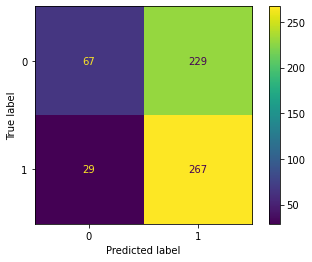

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Ytrain, Ypred)
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=sgd_clf.classes_).plot()

### 3.2 Metrics

In [12]:
from sklearn.metrics import precision_score, recall_score

In [13]:
def print_metrics(Y_actual, Y_predicted):
    print("accuracy:", accuracy_score(Y_actual, Y_predicted))
    print("precision:", precision_score(Y_actual, Y_predicted))
    print("recall:", recall_score(Y_actual, Y_predicted))

Accuracy and recall are quite low whereas recall is high.

### 3.3 Cross-validation metrics

The various score we have obtained so far are computed using the train dataset.

There is no guarantee however that these scores will be the same on the test dataset (and in rela conditions)

How can we get an indication of how the model will be behave on a different set knowing that we don't want to use the test set as this stage because we would like to explore alternatives to logistic regression first and keep the best model (and hyperparameters)?

One solution is to use the $k$ fold cross validation technique.

In $k$-fold cross-validation, the training set is (randomly) split into $k$ smaller sets.

Then the following procedure is applied for each of the $k$ folds:
- The model
- Then the resulting model is validated on the remaining

<img src="CrossValidation.png" width=40%>

In [14]:
from sklearn.model_selection import cross_val_score
scores_sgd_clf = cross_val_score(sgd_clf, Xtrain_norm, Ytrain,
                                 cv=5, scoring='precision')
print(scores_sgd_clf)
print(scores_sgd_clf.mean())
print(scores_sgd_clf.std())

[0.64705882 0.57142857 0.50434783 0.71428571 0.5       ]
0.5874241870661308
0.08300682732394155


In [15]:
print_metrics(Ytrain, Ypred)

accuracy: 0.5641891891891891
precision: 0.5383064516129032
recall: 0.902027027027027


### 3.4. AUC

In [16]:
from sklearn.model_selection import cross_val_predict
Yscores = cross_val_predict(sgd_clf, Xtrain_norm, Ytrain, cv=None,
                             method="decision_function")

In [17]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Ytrain, Yscores)

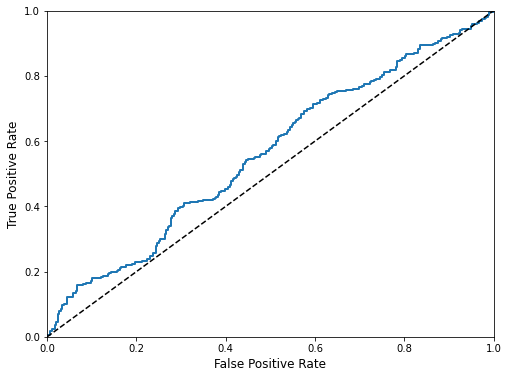

In [18]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Ytrain,Yscores)

0.5589960737764792

## 4. Penalized logistic

In [20]:
sgd_clf_pen = SGDClassifier(random_state=42, loss='log', shuffle=True, penalty='l2')
sgd_clf_pen.fit(Xtrain_norm, Ytrain)
Ypred = sgd_clf_pen.predict(Xtrain_norm)
print_metrics(Ytrain, Ypred)

accuracy: 0.5118243243243243
precision: 0.5060034305317325
recall: 0.9966216216216216


In [21]:
sgd_clf_pen = SGDClassifier(random_state=42, loss='log', shuffle=True, penalty='elasticnet', l1_ratio=0.5)
sgd_clf_pen.fit(Xtrain_norm, Ytrain)
Ypred = sgd_clf_pen.predict(Xtrain_norm)
print_metrics(Ytrain, Ypred)

accuracy: 0.5625
precision: 0.6697247706422018
recall: 0.24662162162162163


In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'l1_ratio': np.arange(0,1.1,.1)}
grid_search = GridSearchCV(sgd_clf_pen, param_grid, cv=5, scoring='roc_auc')
x = grid_search.fit(Xtrain, Ytrain)
x.cv_results_

{'mean_fit_time': array([0.00378933, 0.00358996, 0.00140576, 0.00313001, 0.00312448,
        0.        , 0.0031179 , 0.        , 0.00312428, 0.00624847,
        0.        ]),
 'std_fit_time': array([0.00074531, 0.00079774, 0.0013502 , 0.00626001, 0.00624895,
        0.        , 0.00623579, 0.        , 0.00624857, 0.00765279,
        0.        ]),
 'mean_score_time': array([0.00159559, 0.00159602, 0.00079789, 0.00312481, 0.00312424,
        0.00312428, 0.        , 0.00624852, 0.        , 0.        ,
        0.        ]),
 'std_score_time': array([0.00048811, 0.00048856, 0.00097721, 0.00624962, 0.00624847,
        0.00624857, 0.        , 0.00765285, 0.        , 0.        ,
        0.        ]),
 'param_l1_ratio': masked_array(data=[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                    0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='

In [23]:
x.best_params_

{'l1_ratio': 0.30000000000000004}

In [24]:
sgd_clf_pen_optim = grid_search.best_estimator_
sgd_clf_pen_optim.fit(Xtrain_norm, Ytrain)

SGDClassifier(l1_ratio=0.30000000000000004, loss='log', penalty='elasticnet',
              random_state=42)

In [25]:
from sklearn.model_selection import cross_val_predict
Yscores_sgd_clf_pen_optim = cross_val_predict(sgd_clf_pen_optim, Xtrain_norm, Ytrain,
                                              cv=None, method="decision_function")

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Ytrain, Yscores_sgd_clf_pen_optim)

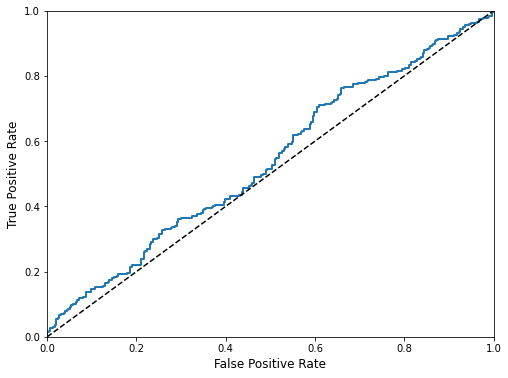

In [27]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [28]:
scores_sgd_clf = cross_val_score(sgd_clf, Xtrain_norm, Ytrain,
                                 cv=5, scoring='roc_auc')
print(scores_sgd_clf)
print(scores_sgd_clf.mean())
print(scores_sgd_clf.std())

[0.62288136 0.5799435  0.6659006  0.6725079  0.53088193]
0.6144230585080915
0.053410278144518965


In [29]:
scores_sgd_clf_pen_optim = cross_val_score(sgd_clf_pen_optim, Xtrain_norm, Ytrain,
                                 cv=5, scoring='roc_auc')
print(scores_sgd_clf_pen_optim)
print(scores_sgd_clf_pen_optim.mean())
print(scores_sgd_clf_pen_optim.std())

[0.60056497 0.57881356 0.64636599 0.63487504 0.51910371]
0.5959446519199464
0.04533704554082423


## 5. Decision trees

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DTC_max=DecisionTreeClassifier()
DTC_max.fit(Xtrain_norm,Ytrain)

DecisionTreeClassifier()

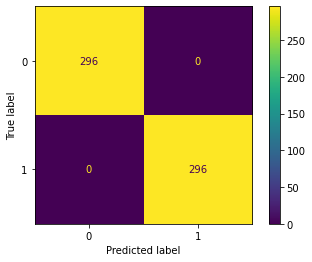

In [31]:
Ypred = DTC_max.predict(Xtrain_norm)
cm = confusion_matrix(Ytrain, Ypred)
ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=DTC_max.classes_).plot()

In [32]:
'''
import graphviz 
dot_data = tree.export_graphviz(DTC_max, out_file=None, 
                     feature_names=['X' + str(x) for x in range(37)],  
                     class_names=['Healthy',"Bankrupt"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
'''

'\nimport graphviz \ndot_data = tree.export_graphviz(DTC_max, out_file=None, \n                     feature_names=[\'X\' + str(x) for x in range(37)],  \n                     class_names=[\'Healthy\',"Bankrupt"],  \n                     filled=True, rounded=True,  \n                     special_characters=True)  \ngraph = graphviz.Source(dot_data)  \ngraph\n'

In [33]:
y_pred = DTC_max.predict(Xtrain_norm)
print_metrics(Ytrain, y_pred)

accuracy: 1.0
precision: 1.0
recall: 1.0


In [34]:
x = cross_val_score(DTC_max, Xtrain_norm, Ytrain, cv=5, scoring='roc_auc')
print(x)
print(x.mean())
print(x.std())

[0.65550847 0.52937853 0.54237288 0.6779661  0.60169492]
0.6013841807909606
0.05909564010188365


In [35]:
DTC=DecisionTreeClassifier()
param_grid = {'max_depth': np.arange(3,8), 'min_samples_leaf' : np.arange(5,20)}
grid_search = GridSearchCV(DTC, param_grid, cv=5, scoring='roc_auc')
x = grid_search.fit(Xtrain_norm, Ytrain)

In [36]:
x.best_params_

{'max_depth': 6, 'min_samples_leaf': 18}

In [37]:
DTC_optim=x.best_estimator_
DTC_optim.fit(Xtrain_norm,Ytrain)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=18)

In [38]:
x = cross_val_score(DTC_optim, Xtrain_norm, Ytrain, cv=5, scoring='roc_auc')
print(x)
print(x.mean())
print(x.std())

[0.73008475 0.6519774  0.67193335 0.72076989 0.66848607]
0.6886502920616681
0.030917424617691824


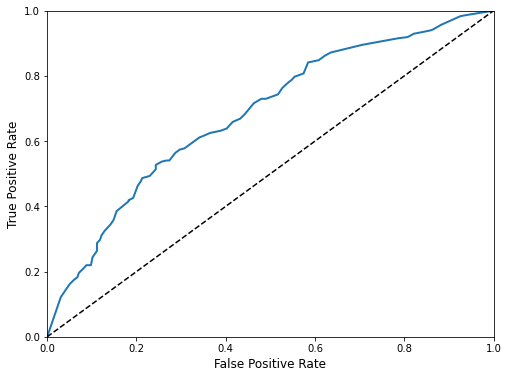

In [39]:
y_probas_DTC_optim = cross_val_predict(DTC_optim, Xtrain_norm, Ytrain,
                                       cv=None, method="predict_proba")
y_scores_DTC_optim = y_probas_DTC_optim[:,-1]
fpr, tpr, thresholds = roc_curve(Ytrain, y_scores_DTC_optim)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [40]:
roc_auc_score(Ytrain,y_scores_DTC_optim)

0.6825693937180425

## 6. Random forests

In [64]:
from sklearn.ensemble import RandomForestClassifier
RFC_max = RandomForestClassifier(random_state=42)
RFC_max.fit(Xtrain_norm, Ytrain)

RandomForestClassifier(random_state=42)

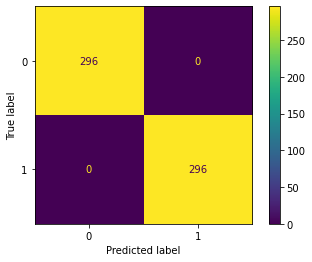

In [65]:
Ypred = RFC_max.predict(Xtrain_norm)
cm = confusion_matrix(Ytrain, Ypred)
ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=DTC_max.classes_).plot()

In [66]:
y_pred = RFC_max.predict(Xtrain_norm)
print_metrics(Ytrain, y_pred)

accuracy: 1.0
precision: 1.0
recall: 1.0


In [67]:
x = cross_val_score(RFC_max, Xtrain_norm, Ytrain, cv=5, scoring='roc_auc')
print(x)
print(x.mean())
print(x.std())

[0.74223164 0.69025424 0.74604999 0.77276645 0.67092789]
0.724446040409844
0.0378184900510811


In [93]:
RFC=RandomForestClassifier()
param_grid = {'max_depth': np.arange(5,15),
             'min_samples_leaf' : np.arange(5,20),
             }
grid_search = GridSearchCV(RFC, param_grid, cv=5, scoring='roc_auc', n_jobs=8)
x = grid_search.fit(Xtrain, Ytrain)

In [94]:
x.best_params_

{'max_depth': 14, 'min_samples_leaf': 10}

In [95]:
RFC_optim=x.best_estimator_
RFC_optim.fit(Xtrain_norm,Ytrain)
x = cross_val_score(RFC_optim, Xtrain_norm, Ytrain, cv=5, scoring='roc_auc')
print(x)
print(x.mean())
print(x.std())

[0.79180791 0.66581921 0.75064637 0.74518816 0.65670784]
0.7220338983050848
0.05225091547709448


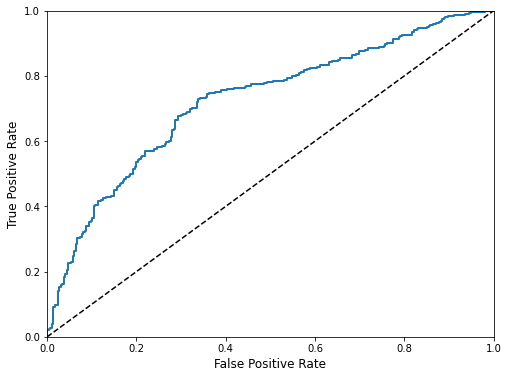

In [96]:
y_probas_RFC_optim = cross_val_predict(RFC_optim, Xtrain_norm, Ytrain, cv=5, method="predict_proba")
y_scores_RFC_optim = y_probas_RFC_optim[:,-1]
fpr, tpr, thresholds = roc_curve(Ytrain, y_scores_RFC_optim)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [97]:
roc_auc_score(Ytrain,y_scores_RFC_optim)

0.7229159057706356

## 7. Performance on the test set


In [98]:
def print_metrics2(classifier, classifier_name):
    y_pred = classifier.predict(Xtest_norm)
    print(classifier_name)
    print("precision:", precision_score(Ytest, y_pred))
    print("accuracy:", accuracy_score(Ytest, y_pred))
    print("recall:", recall_score(Ytest, y_pred))
    print("AUC:", roc_auc_score(Ytest, y_pred),"\n")

In [99]:
print_metrics2(sgd_clf, "sgd_clf")
print_metrics2(sgd_clf_pen_optim, "sgd_clf_pen_optim")
print_metrics2(DTC_max, "DTC_max")
print_metrics2(DTC_optim, "DTC_optim")
print_metrics2(RFC_max, "RFC_max")
print_metrics2(RFC_optim, "RFC_optim")

sgd_clf
precision: 0.012143539364169736
accuracy: 0.2365206402695872
recall: 0.898989898989899
AUC: 0.5642656209858509 

sgd_clf_pen_optim
precision: 0.014925373134328358
accuracy: 0.9827295703454086
recall: 0.010101010101010102
AUC: 0.5015387459784608 

DTC_max
precision: 0.01648059542796385
accuracy: 0.6064658803706824
recall: 0.6262626262626263
AUC: 0.6162599712136798 

DTC_optim
precision: 0.01714573877962683
accuracy: 0.5862468407750632
recall: 0.6868686868686869
AUC: 0.6360277243005773 

RFC_max
precision: 0.021379980563654033
accuracy: 0.678390901432182
recall: 0.6666666666666666
AUC: 0.6725905430811251 

RFC_optim
precision: 0.023506366307541625
accuracy: 0.6821819713563606
recall: 0.7272727272727273
AUC: 0.704489827507812 



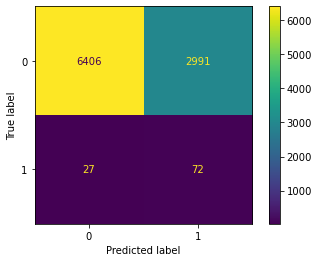

In [100]:
y_pred = RFC_optim.predict(Xtest_norm)
cm = confusion_matrix(Ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=RFC_optim.classes_)
disp.plot()

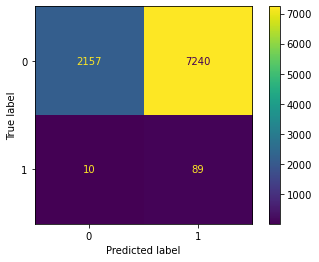

In [101]:
y_pred = sgd_clf.predict(Xtest_norm)
cm = confusion_matrix(Ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd_clf.classes_)
disp.plot()